Performing various steps to understand the data and its distribtuion.

1. Understanding the data

2. Analysis on various columns present.

3. Pre-processing the data

4. Merging attributes.

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
#to exapnd
!pip install contractions
#you're will be split to you are ,can't to can not 

     |████████████████████████████████| 245kB 3.6MB/s 
     |████████████████████████████████| 317kB 17.1MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81708 sha256=09104443347825e6ee99218e8480553ff06960f666ce2df8332d5698a3707cd1
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


## **Understading the data**

In [0]:
#setting project path
import os
os.chdir('/content/drive/My Drive')

In [0]:
#to check if the current working directory is same as mentioned above
path = os.getcwd()
print(path)

/content/drive/My Drive


In [0]:
import numpy as np
import pandas as pd
df = pd.read_excel("input_data.xlsx",encoding='utf-8')

#checking few records from dataset to understand the structure of data
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [0]:
df.shape

(8500, 4)

In [0]:
#checking for null values in our dataset
df.isna().sum()


Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [0]:
print(df[df["Short description"].isnull()].head(10))
#Rows with null values for coulmn "Short description"

     Short description  ... Assignment group
2604               NaN  ...           GRP_34
3383               NaN  ...            GRP_0
3906               NaN  ...            GRP_0
3910               NaN  ...            GRP_0
3915               NaN  ...            GRP_0
3921               NaN  ...            GRP_0
3924               NaN  ...            GRP_0
4341               NaN  ...            GRP_0

[8 rows x 4 columns]


In [0]:
print(df[df["Description"].isnull()].head(10))
#Rows with null values for coulmn "Description"

             Short description Description             Caller Assignment group
4395  i am locked out of skype         NaN  viyglzfo ajtfzpkb            GRP_0


In [0]:
#If we look at the data set, only "short Description"(8) and "Description"(1) have null values.
#Since we merge both the columns later short Description"(8) and "Description"(1), will end up getting "No NULL values",
#As there no row having null data for both the cols.
#So will not remove any of the rows

In [0]:
#checking the size and shape of the dataset
print('Shape = :', df.shape)
print('Size =', df.size)
#we have removed 9 rows from the main dataset as they had missing values

Shape = : (8500, 4)
Size = 34000


In [0]:
#checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [0]:
df.describe()

,Short description,Description,Caller,Assignment group
count,8492,8499,8500,8500
unique,7481,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


FROM THE ABOVE ANALYSIS WE KMOW THAT OUR DATASET HAS **7841** UNIQUE WORDS IN SHORT DESCRIPTION AND **7817** IN DESCRIPTION AND WE HAVE **2950** UNIQUE CALLERS AND 74 ASSIGNMENT GROUPS


## **UNI-VARIATE ANALYSIS**

### Analysis on the  Column : 'Assignment group

In [0]:
#checking how many groups are there and getting counts 
unique_groups = df['Assignment group'].unique()
print('Unique Groups count: ',len(unique_groups))
print('Unique Groups in assignment\n',unique_groups)

Unique Groups count:  74
Unique Groups in assignment
 ['GRP_0' 'GRP_1' 'GRP_3' 'GRP_4' 'GRP_5' 'GRP_6' 'GRP_7' 'GRP_8' 'GRP_9'
 'GRP_10' 'GRP_11' 'GRP_12' 'GRP_13' 'GRP_14' 'GRP_15' 'GRP_16' 'GRP_17'
 'GRP_18' 'GRP_19' 'GRP_2' 'GRP_20' 'GRP_21' 'GRP_22' 'GRP_23' 'GRP_24'
 'GRP_25' 'GRP_26' 'GRP_27' 'GRP_28' 'GRP_29' 'GRP_30' 'GRP_31' 'GRP_33'
 'GRP_34' 'GRP_35' 'GRP_36' 'GRP_37' 'GRP_38' 'GRP_39' 'GRP_40' 'GRP_41'
 'GRP_42' 'GRP_43' 'GRP_44' 'GRP_45' 'GRP_46' 'GRP_47' 'GRP_48' 'GRP_49'
 'GRP_50' 'GRP_51' 'GRP_52' 'GRP_53' 'GRP_54' 'GRP_55' 'GRP_56' 'GRP_57'
 'GRP_58' 'GRP_59' 'GRP_60' 'GRP_61' 'GRP_32' 'GRP_62' 'GRP_63' 'GRP_64'
 'GRP_65' 'GRP_66' 'GRP_67' 'GRP_68' 'GRP_69' 'GRP_70' 'GRP_71' 'GRP_72'
 'GRP_73']


In [0]:
#checking the frequency of each group
group_freq = df.groupby(df['Assignment group'])['Assignment group'].count().sort_values(ascending=False)
group_freq = pd.DataFrame(group_freq)

group_freq

,Assignment group
Assignment group,
GRP_0,3976
GRP_8,661
GRP_24,289
GRP_12,257
GRP_9,252
...,...
GRP_67,1
GRP_61,1
GRP_73,1


We notice that most of the tickets are assigned to grp_0

                  Assignment group  cumpercentage
Assignment group                                 
GRP_0                         3976      46.776471
GRP_8                          661      54.552941
GRP_24                         289      57.952941
GRP_12                         257      60.976471
GRP_9                          252      63.941176
...                            ...            ...
GRP_67                           1      99.952941
GRP_61                           1      99.964706
GRP_73                           1      99.976471
GRP_35                           1      99.988235
GRP_70                           1     100.000000

[74 rows x 2 columns]


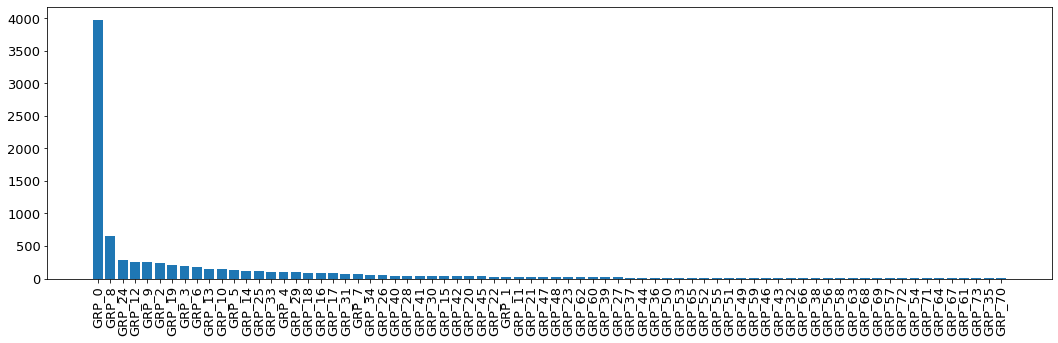

In [0]:
import matplotlib.pyplot as plt
#getting cumulative distribution of tickets
group_freq["cumpercentage"] = group_freq["Assignment group"].cumsum()/group_freq["Assignment group"].sum()*100
#visulaizing the tickets assigned to each group
fig, ax = plt.subplots(figsize=(18,5))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=13)
ax.bar(group_freq.index, group_freq["Assignment group"], color="C0")
print(group_freq)


plt.show()

From the above statistics we can observe that the dataset is not normally distributed.

 46% of the tickets are assigned to **GROUP_0**. 

Hence we can expect better prediction for Group_0 incident tickets when compared with other groups in the dataset*

**Pie Chart** Visualization for group counts

<Figure size 1440x864 with 0 Axes>

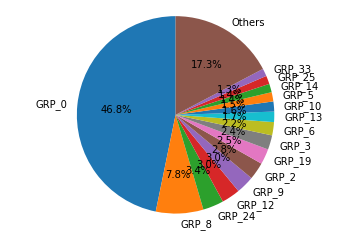

In [0]:
#selecting groups having more count more than 100
Pie_chart_data=group_freq["Assignment group"][group_freq["Assignment group"] >100] 
Pie_chart_data['Others']=(8500 - Pie_chart_data.values.sum(axis=0))


plt.figure(figsize=(20,12))
labels=list(Pie_chart_data.index)
sizes=Pie_chart_data.values/8500
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, shadow=False, startangle=90,autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Analysis on the  Column : 'Caller' (Target col)

In [0]:
#let us now check the number of callers and unique callers in that set
print('Total Caller      :',len(df['Caller']))
print('Total unique Caller:',len(set(df['Caller'])))

Total Caller      : 8500
Total unique Caller: 2950


In [0]:
#checking the frequency of callers
caller_freq = df.groupby(df['Caller'])['Caller'].count().sort_values(ascending=False)
caller_freq = pd.DataFrame(caller_freq)
print(caller_freq)

                   Caller
Caller                   
bpctwhsn kzqsbmtp     810
ZkBogxib QsEJzdZO     151
fumkcsji sarmtlhy     134
rbozivdq gmlhrtvp      87
rkupnshb gsmzfojw      71
...                   ...
kcldufqe xghvrzoi       1
kclhqspo xvugztyc       1
tbloeczi gxlmeyph       1
kcqzrgef awnjdlyr       1
nhixruet elnjqdwg       1

[2950 rows x 1 columns]


In [0]:
caller_freq = df.groupby(df['Caller'])['Caller'].count().sort_values(ascending=False)
caller_freq = pd.DataFrame(caller_freq)
caller_freq["cumpercentage"] = (caller_freq["Caller"].cumsum()/caller_freq["Caller"].sum()*100).round(2)
caller_freq

,Caller,cumpercentage
Caller,,
bpctwhsn kzqsbmtp,810,9.53
ZkBogxib QsEJzdZO,151,11.31
fumkcsji sarmtlhy,134,12.88
rbozivdq gmlhrtvp,87,13.91
rkupnshb gsmzfojw,71,14.74
...,...,...
kcldufqe xghvrzoi,1,99.95
kclhqspo xvugztyc,1,99.96
tbloeczi gxlmeyph,1,99.98


From the above statistics we can observe that Caller **bpctwhsn kzqsbmtp** has raised majority of the tickets and out of 2950 unique callers.

## Top10 Callers

In [0]:
#checking the frequency of each group
Caller_freq = df.groupby(df['Caller'])['Caller'].count().sort_values(ascending=False)
Caller_freq = pd.DataFrame(Caller_freq)

Caller_freq
Top_10_Callers=Caller_freq.head(10)

                   Caller  cumpercentage
Caller                                  
bpctwhsn kzqsbmtp     810      52.529183
ZkBogxib QsEJzdZO     151      62.321660
fumkcsji sarmtlhy     134      71.011673
rbozivdq gmlhrtvp      87      76.653696
rkupnshb gsmzfojw      71      81.258106
jloygrwh acvztedi      64      85.408560
spxqmiry zpwgoqju      63      89.494163
oldrctiu bxurpsyi      57      93.190661
olckhmvx pcqobjnd      54      96.692607
dkmcfreg anwmfvlg      51     100.000000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


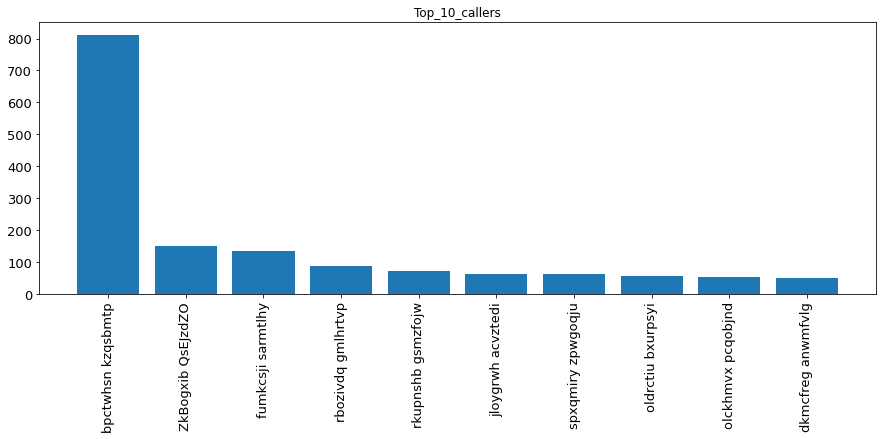

In [0]:
Top_10_Callers["cumpercentage"] = Top_10_Callers["Caller"].cumsum()/Top_10_Callers["Caller"].sum()*100
#visulaizing the tickets assigned to each group
fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=13)
plt.title('Top_10_callers')
ax.bar(Top_10_Callers.index, Top_10_Callers["Caller"], color="C0")
print(Top_10_Callers)


plt.show()

In [0]:
#since we noticed 'bpctwhsn kzqsbmtp'  is the top caller let us see the groups to which he has raised tickets
df[df['Caller']=='bpctwhsn kzqsbmtp']['Assignment group'].value_counts()

GRP_8     362
GRP_9     153
GRP_5      96
GRP_6      89
GRP_10     60
GRP_60     16
GRP_12      8
GRP_45      7
GRP_1       6
GRP_13      4
GRP_18      3
GRP_47      2
GRP_57      1
GRP_29      1
GRP_44      1
GRP_14      1
Name: Assignment group, dtype: int64

Most of the tickets have been raised to grp **8,9,5,6,10 and 60**

#### Piechart based number of tickets raised by particular caller name

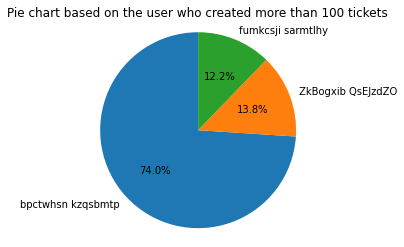

In [0]:
Pie_chart_data=Caller_freq["Caller"][Caller_freq["Caller"] >100] 
#Pie_chart_data['Others']=(8500 - Pie_chart_data.values.sum(axis=0))


labels=list(Pie_chart_data.index)
sizes=Pie_chart_data.values/Pie_chart_data.values.sum(axis=0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, shadow=False, startangle=90,autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Pie chart based on the user who created more than 100 tickets")
plt.show()

#### Top 5 groups to which the users have created the tickets for each top 10 users

In [0]:
#here we are seeing the geoups to which the top 10 users have created tickets to

grp_vs_caller= df[df.Caller.isin(list(Top_10_Callers['Caller'].index))]
grp_vs_caller


,Short description,Description,Caller,Assignment group
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0
15,ticket update on inplant_874743,ticket update on inplant_874743,fumkcsji sarmtlhy,GRP_0
23,user called for vendor phone number,user called for vendor phone number,fumkcsji sarmtlhy,GRP_0
39,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
40,ticket update - inplant_874615,ticket update - inplant_874615,olckhmvx pcqobjnd,GRP_0
...,...,...,...,...
8482,robot HostName_776 is inactive,robot HostName_776 is inactive,rkupnshb gsmzfojw,GRP_8
8485,ticket update on inc1538505 to user hbmwlprq i...,ticket update on inc1538505 to user hbmwlprq i...,fumkcsji sarmtlhy,GRP_0
8486,ticket update on ticket_no0427635,ticket update on ticket_no0427635,fumkcsji sarmtlhy,GRP_0
8488,erp account unlock,name:mfeyouli ndobtzpw\nlanguage:\nbrowser:mic...,rbozivdq gmlhrtvp,GRP_0


In [0]:
grp_vs_caller_=pd.DataFrame(grp_vs_caller.groupby(['Caller','Assignment group'],sort=True).size().reset_index(name="count"))
grp_vs_caller_

,Caller,Assignment group,count
0,ZkBogxib QsEJzdZO,GRP_1,1
1,ZkBogxib QsEJzdZO,GRP_10,2
2,ZkBogxib QsEJzdZO,GRP_14,2
3,ZkBogxib QsEJzdZO,GRP_29,2
4,ZkBogxib QsEJzdZO,GRP_47,8
...,...,...,...
83,spxqmiry zpwgoqju,GRP_47,2
84,spxqmiry zpwgoqju,GRP_60,1
85,spxqmiry zpwgoqju,GRP_65,1
86,spxqmiry zpwgoqju,GRP_8,26


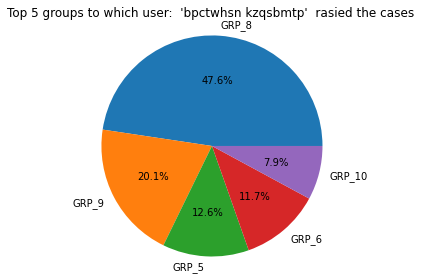

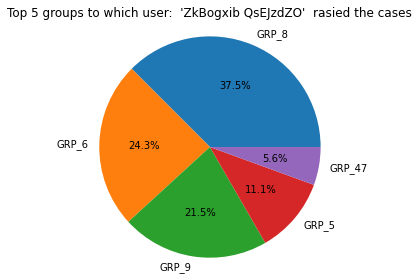

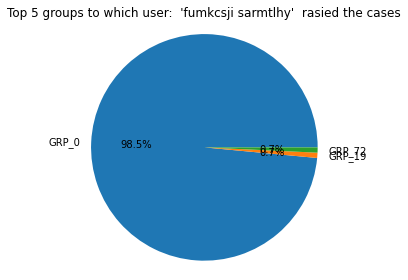

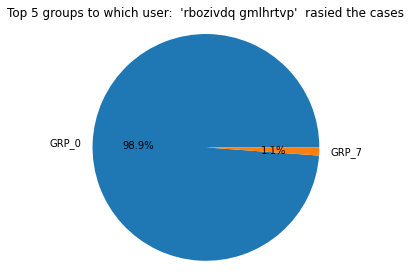

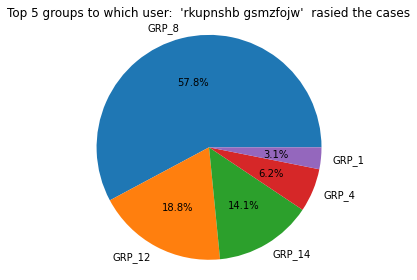

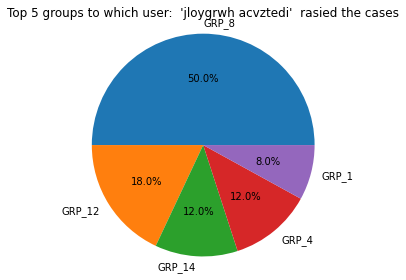

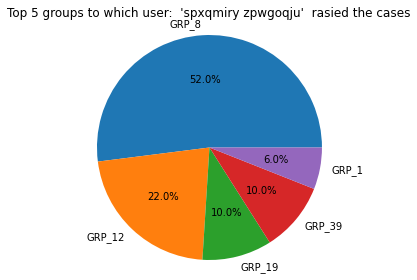

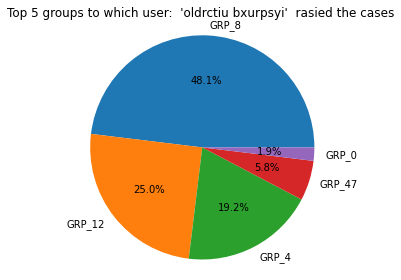

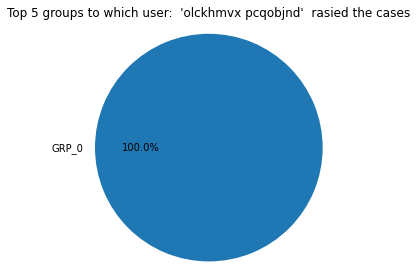

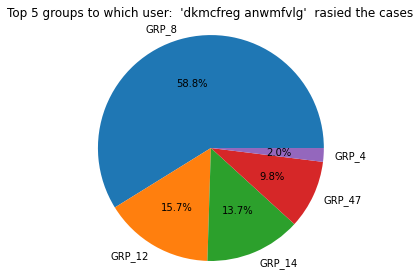

In [0]:
for i in list(list(Top_10_Callers['Caller'].index)):
  Pie_chart_data=grp_vs_caller_[grp_vs_caller_['Caller']==i].sort_values(by='count',ascending=False).head(5)
  labels=list(Pie_chart_data['Assignment group'])
  sizes =list(Pie_chart_data['count']/Pie_chart_data['count'].sum(axis=0))
  #list(a['count']/a['count'].sum(axis=0))
  fig1, ax1 = plt.subplots()
  ax1.pie(sizes,labels=labels, shadow=False, autopct='%1.1f%%')
  ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.title("Top 5 groups to which user:  '"+i+"'  rasied the cases")
  plt.tight_layout()
  #fig1.savefig(i+".png")
  plt.show(block=True )

From the above statistics we can observe that Caller bpctwhsn kzqsbmtp has raised majority of the tickets and out of 2950 unique callers.



## Analysis on the column : 'Short description' and 'Description'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


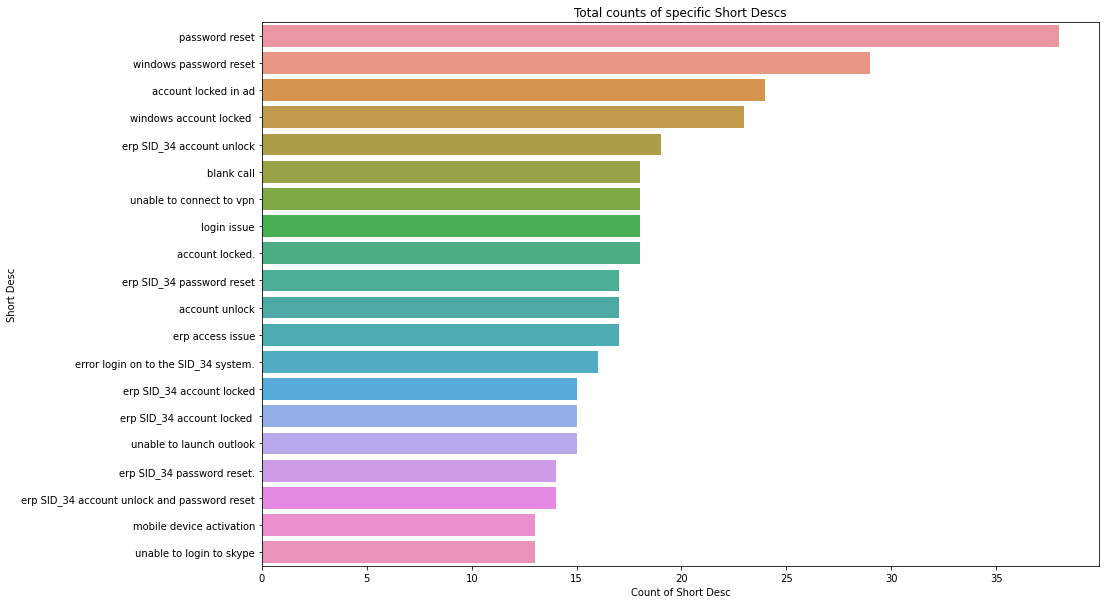

In [0]:
#Visualizing the distrinution of the column'Short Description'
import seaborn as sns
fig, (ax1) = plt.subplots(1,1, figsize=(15,10))

x = df['Short description'].value_counts()[:20]
sns.barplot(x, x.index, ax=ax1)
plt.title('Total counts of specific Short Descs')
plt.gca().set_xlabel('Count of Short Desc')
plt.gca().set_ylabel('Short Desc')

plt.show()

In [0]:
#checking length and unique entries in short description and description
print('Total Short Description:',len(df['Short description']))
print('Total unique Short Description:',len(set(df['Short description'])))

print('Total Description:',len(df['Description']))
print('Total unique Description:',len(set(df['Description'])))

Total Short Description: 8500
Total unique Short Description: 7482
Total Description: 8500
Total unique Description: 7818


# **OBSERVATIONS**

1.   From the above analysis we can conclude that our dataset contained 8500 rows and 4 cols which contained null values.

2.  We notice null values but since we are going to merge columns we are not removing it.

3. We have a total of 74 unique groups and 2948 unique callers.

4. We see a major contribution from GROUP_0 of assignment group which handles almost 50% of the input tickets which results in low accuracy for those groups having less percentage.

5. We notice caller **bpctwhsn kzqsbmtp** contributes to 10% of the total tickets which tells that a single caller has many issues.


 






# **DATA PRE-PROCESSING**

Main goal is to Merge 'Short description' and Description

## **CLEANING OF DATA**

In [0]:
#before cleaning the data
df['Description'][1]

'\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind '

•	Converting to lower case

•	Removal of hyperlinks

•	Removal of URL

•	Removal of e-mail

•	Removal of special characters

•	Expanding the text

•	Removal of single char and extra spaces

•	Removal of stop words

•	Performing stemming and Lemmatization    




In [0]:
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import contractions
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
#Common function for text cleaning

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(text):
    sentence     = str(text)

#Converting to lower case
    lower = sentence.lower() 
    clean        = re.compile('<.*?>')        
#Remove hyperlink  
    hyperlink    = re.sub(clean, '',lower)       
  #Remove Web link                         
    url      = re.sub(r'http:\S+', ' ',hyperlink) 
  #removing mailid                         
    mail     = re.sub(r"\S*@\S*.com\s?",' ',url)          
 #expanding text
    expand   = contractions.fix(mail)   
  #special characters                               
    specialchar  = re.sub(r"[!';:@#$%^&*()~?<>,\.:+-=`""'\'_]",' ',expand)
  #numbers 
    num      = re.sub(r'\d', '', specialchar)                              
    spcl     = re.sub("([^\x00-\x7F])+"," ",num)   
  #singlechar                    
    single   = re.sub(r"\s+[a-zA-Z]\s+", ' ',spcl)    
  #extraspaces                 
    spaces      = re.sub(r"\s+", ' ',single)                             
    tokenizer    = RegexpTokenizer(r'\w+')
    text_token   = tokenizer.tokenize(spaces)  #Text tokenized  
#Removal of stop words
    filter_words = [w for w in text_token if len(w) > 2 if not w in stopwords.words('english')]                    
#Word Stemming
    words_stem   = [stemmer.stem(w) for w in filter_words]
#Word Lemmatization
    clean_text   = [lemmatizer.lemmatize(w) for w in words_stem]
    return " ".join(clean_text)
    

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
df['Short description'] = df['Short description'].map(lambda x:preprocess(x))
df['Description'] = df['Description'].map(lambda x:preprocess(x))

In [0]:

df.head()


,Short description,Description,Caller,Assignment group
0,login issu,verifi user detail employe manag name check us...,spxjnwir pjlcoqds,GRP_0
1,outlook,receiv hello team meet skype meet etc appear o...,hmjdrvpb komuaywn,GRP_0
2,log vpn,receiv cannot log vpn best,eylqgodm ybqkwiam,GRP_0
3,unabl access tool page,unabl access tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


we notice that our data is cleaned and looks neat.

In [0]:
#after cleaning the data
df['Description'][1]

'receiv hello team meet skype meet etc appear outlook calendar somebodi plea advis correct kind'

we notice all the unwanted stuff is removed.

We notice that our dataset has languages other than english.

In certain rows description and short description are same. so we can merge them

In [0]:
#merge short Description & Description

df['isSubstr'] =df.apply(lambda x: x['Short description'] not in x['Description'], axis=1)

#we notice redundancy in short description hence we will append with description wherever the redundancy is present.
df_merge=df.copy()
df_merge.loc[df_merge['isSubstr'] == True, 'Description'] =df_merge['Short description'] + " "+ df_merge['Description']
#Drop Short description and issubstr
df_merge =df_merge.drop(['Short description'],axis=1)
df_merge =df_merge.drop(['isSubstr'],axis=1)
df_merge.tail()

,Description,Caller,Assignment group
8495,email come mail receiv good afternoon receiv e...,avglmrts vhqmtiua,GRP_29
8496,telephoni softwar issu,rbozivdq gmlhrtvp,GRP_0
8497,vip window password reset tifpdchb pedxruyf,oybwdsgx oxyhwrfz,GRP_0
8498,machin est funcionando unabl access machin uti...,ufawcgob aowhxjky,GRP_62
8499,mehreren lassen sich verschieden prgramdntym n...,kqvbrspl jyzoklfx,GRP_49


In [0]:
df.head()

,Short description,Description,Caller,Assignment group,isSubstr
0,login issu,verifi user detail employe manag name check us...,spxjnwir pjlcoqds,GRP_0,False
1,outlook,receiv hello team meet skype meet etc appear o...,hmjdrvpb komuaywn,GRP_0,False
2,log vpn,receiv cannot log vpn best,eylqgodm ybqkwiam,GRP_0,False
3,unabl access tool page,unabl access tool page,xbkucsvz gcpydteq,GRP_0,False
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,False


In [0]:
#append caller into description if not already present

df_merge['isCallerNotSubstr'] =df_merge.apply(lambda x: x['Caller'] not in x['Description'], axis=1)

#We will append caller to description if True only then drop short description
df_merge_caller = df_merge.copy()
df_merge_caller.loc[df_merge_caller['isCallerNotSubstr'] == True, 'Description'] =df_merge_caller['Description'] + " " +df_merge_caller['Caller'] 
#Drop Caller
df_merge_caller = df_merge_caller.drop(['Caller'],axis=1)
df_merge_caller = df_merge_caller.drop(['isCallerNotSubstr'],axis=1)
df_merge_caller.tail(10)

,Description,Assignment group
8490,check statu purchas plea contact pasgryowski p...,GRP_29
8491,vpn laptop receiv need vpn new laptop name llv...,GRP_34
8492,tool etim option visitbl tmopbken ibzougsd,GRP_0
8493,erp two account ad sorri anoth two account nee...,GRP_10
8494,tablet need reimag due multipl issu crm wifi e...,GRP_3
8495,email come mail receiv good afternoon receiv e...,GRP_29
8496,telephoni softwar issu rbozivdq gmlhrtvp,GRP_0
8497,vip window password reset tifpdchb pedxruyf oy...,GRP_0
8498,machin est funcionando unabl access machin uti...,GRP_62
8499,mehreren lassen sich verschieden prgramdntym n...,GRP_49


In [0]:
df_merge_caller.head()

,Description,Assignment group
0,verifi user detail employe manag name check us...,GRP_0
1,receiv hello team meet skype meet etc appear o...,GRP_0
2,receiv cannot log vpn best eylqgodm ybqkwiam,GRP_0
3,unabl access tool page xbkucsvz gcpydteq,GRP_0
4,skype error owlgqjme qhcozdfx,GRP_0


In [0]:
#let us make a copy of description as nndes for neural network and mldes for Tradional ml models
df_merge_caller['nndes'] = df_merge_caller['Description'].copy()
df_merge_caller['mldes'] = df_merge_caller['Description'].copy()
df_merge_caller.head()

,Description,Assignment group,nndes,mldes
0,verifi user detail employe manag name check us...,GRP_0,verifi user detail employe manag name check us...,verifi user detail employe manag name check us...
1,receiv hello team meet skype meet etc appear o...,GRP_0,receiv hello team meet skype meet etc appear o...,receiv hello team meet skype meet etc appear o...
2,receiv cannot log vpn best eylqgodm ybqkwiam,GRP_0,receiv cannot log vpn best eylqgodm ybqkwiam,receiv cannot log vpn best eylqgodm ybqkwiam
3,unabl access tool page xbkucsvz gcpydteq,GRP_0,unabl access tool page xbkucsvz gcpydteq,unabl access tool page xbkucsvz gcpydteq
4,skype error owlgqjme qhcozdfx,GRP_0,skype error owlgqjme qhcozdfx,skype error owlgqjme qhcozdfx


In [0]:
#Check number & Distribution of assignment groups
df_merge_caller['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_67       1
GRP_73       1
GRP_35       1
GRP_64       1
GRP_61       1
Name: Assignment group, Length: 74, dtype: int64

In order to reduce our noise level, out of 74 categories there are few groups with very few tickets.so we can consider only the one's which have atleast 20 tickets.

In [0]:

group_frequency = dict(df_merge_caller['Assignment group'].value_counts())

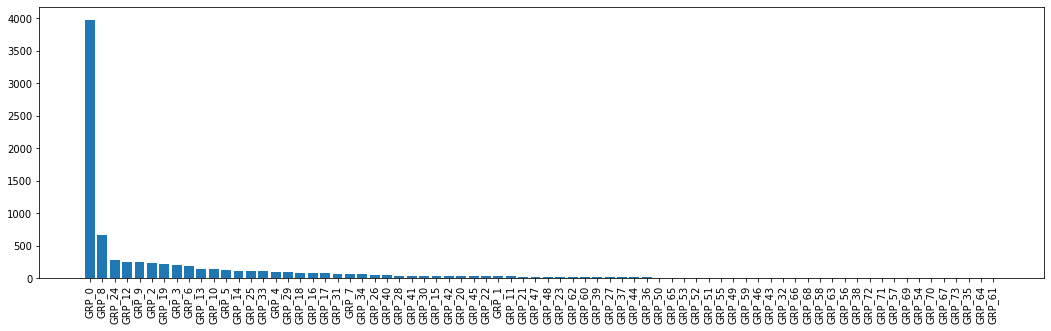

In [0]:
#visulizing the group frequency
fig, ax = plt.subplots(figsize=(18,5))
plt.xticks(rotation='vertical')
plt.bar(range(len(group_frequency)), group_frequency.values(), align='center')
plt.xticks(range(len(group_frequency)), list(group_frequency.keys()))

plt.show()

In [0]:
print (group_frequency)

{'GRP_0': 3976, 'GRP_8': 661, 'GRP_24': 289, 'GRP_12': 257, 'GRP_9': 252, 'GRP_2': 241, 'GRP_19': 215, 'GRP_3': 200, 'GRP_6': 184, 'GRP_13': 145, 'GRP_10': 140, 'GRP_5': 129, 'GRP_14': 118, 'GRP_25': 116, 'GRP_33': 107, 'GRP_4': 100, 'GRP_29': 97, 'GRP_18': 88, 'GRP_16': 85, 'GRP_17': 81, 'GRP_31': 69, 'GRP_7': 68, 'GRP_34': 62, 'GRP_26': 56, 'GRP_40': 45, 'GRP_28': 44, 'GRP_41': 40, 'GRP_30': 39, 'GRP_15': 39, 'GRP_42': 37, 'GRP_20': 36, 'GRP_45': 35, 'GRP_22': 31, 'GRP_1': 31, 'GRP_11': 30, 'GRP_21': 29, 'GRP_47': 27, 'GRP_48': 25, 'GRP_23': 25, 'GRP_62': 25, 'GRP_60': 20, 'GRP_39': 19, 'GRP_27': 18, 'GRP_37': 16, 'GRP_44': 15, 'GRP_36': 15, 'GRP_50': 14, 'GRP_65': 11, 'GRP_53': 11, 'GRP_52': 9, 'GRP_51': 8, 'GRP_55': 8, 'GRP_49': 6, 'GRP_59': 6, 'GRP_46': 6, 'GRP_43': 5, 'GRP_32': 4, 'GRP_66': 4, 'GRP_68': 3, 'GRP_58': 3, 'GRP_63': 3, 'GRP_56': 3, 'GRP_38': 3, 'GRP_72': 2, 'GRP_71': 2, 'GRP_57': 2, 'GRP_69': 2, 'GRP_54': 2, 'GRP_70': 1, 'GRP_67': 1, 'GRP_73': 1, 'GRP_35': 1, 'GRP_64

In [0]:
#converting them to dataframe 
group_df = pd.DataFrame.from_dict(group_frequency, orient='index', columns=['frequency'])
group_df.head(10)

,frequency
GRP_0,3976
GRP_8,661
GRP_24,289
GRP_12,257
GRP_9,252
GRP_2,241
GRP_19,215
GRP_3,200
GRP_6,184
GRP_13,145


In [0]:
#lets get the stats of this 
group_df.describe(percentiles=[0.1, .25, .5, .75, .95, .99]).transpose()

,count,mean,std,min,10%,25%,50%,75%,95%,99%,max
frequency,74.0,114.864865,465.747516,1.0,2.0,5.25,26.0,84.0,253.75,1556.05,3976.0


In [0]:
#checking the % of distribution with frequency
group_df['percent representation'] = group_df['frequency'] / group_df['frequency'].sum()
group_df['cumulative percentage'] = group_df['percent representation'].cumsum(axis = 0)
group_df.head(40)

,frequency,percent representation,cumulative percentage
GRP_0,3976,0.467765,0.467765
GRP_8,661,0.077765,0.545529
GRP_24,289,0.034000,0.579529
GRP_12,257,0.030235,0.609765
GRP_9,252,0.029647,0.639412
GRP_2,241,0.028353,0.667765
GRP_19,215,0.025294,0.693059
GRP_3,200,0.023529,0.716588
GRP_6,184,0.021647,0.738235
GRP_13,145,0.017059,0.755294


In [0]:
#for 95% significant data, we can merge the groups that have lesser representation
group_elimination_treshold = 20

In [0]:
filtered_group = dict(filter(lambda x: x[1] >= group_elimination_treshold, group_frequency.items()))
print (filtered_group)
valid_group = list(filtered_group)
print(len(valid_group))

{'GRP_0': 3976, 'GRP_8': 661, 'GRP_24': 289, 'GRP_12': 257, 'GRP_9': 252, 'GRP_2': 241, 'GRP_19': 215, 'GRP_3': 200, 'GRP_6': 184, 'GRP_13': 145, 'GRP_10': 140, 'GRP_5': 129, 'GRP_14': 118, 'GRP_25': 116, 'GRP_33': 107, 'GRP_4': 100, 'GRP_29': 97, 'GRP_18': 88, 'GRP_16': 85, 'GRP_17': 81, 'GRP_31': 69, 'GRP_7': 68, 'GRP_34': 62, 'GRP_26': 56, 'GRP_40': 45, 'GRP_28': 44, 'GRP_41': 40, 'GRP_30': 39, 'GRP_15': 39, 'GRP_42': 37, 'GRP_20': 36, 'GRP_45': 35, 'GRP_22': 31, 'GRP_1': 31, 'GRP_11': 30, 'GRP_21': 29, 'GRP_47': 27, 'GRP_48': 25, 'GRP_23': 25, 'GRP_62': 25, 'GRP_60': 20}
41


In [0]:
df_merge_caller.describe()


,Description,Assignment group,nndes,mldes
count,8500,8500,8500,8500
unique,7411,74,7411,7411
top,receiv job job fail job schedul bpctwhsn kzqsbmtp,GRP_0,receiv job job fail job schedul bpctwhsn kzqsbmtp,receiv job job fail job schedul bpctwhsn kzqsbmtp
freq,460,3976,460,460


Will replace the group with value "Manual" if the group is not in the valid list

In [0]:
a=df_merge_caller

for ind in a.index:
    a['Assignment group'][ind]= a['Assignment group'][ind] if a['Assignment group'][ind] in (valid_group) else "Manual"
     #print(a['Assignment group'][ind])  

df_filtered_m=a

df_filtered_m

,Description,Assignment group,nndes,mldes
0,verifi user detail employe manag name check us...,GRP_0,verifi user detail employe manag name check us...,verifi user detail employe manag name check us...
1,receiv hello team meet skype meet etc appear o...,GRP_0,receiv hello team meet skype meet etc appear o...,receiv hello team meet skype meet etc appear o...
2,receiv cannot log vpn best eylqgodm ybqkwiam,GRP_0,receiv cannot log vpn best eylqgodm ybqkwiam,receiv cannot log vpn best eylqgodm ybqkwiam
3,unabl access tool page xbkucsvz gcpydteq,GRP_0,unabl access tool page xbkucsvz gcpydteq,unabl access tool page xbkucsvz gcpydteq
4,skype error owlgqjme qhcozdfx,GRP_0,skype error owlgqjme qhcozdfx,skype error owlgqjme qhcozdfx
...,...,...,...,...
8495,email come mail receiv good afternoon receiv e...,GRP_29,email come mail receiv good afternoon receiv e...,email come mail receiv good afternoon receiv e...
8496,telephoni softwar issu rbozivdq gmlhrtvp,GRP_0,telephoni softwar issu rbozivdq gmlhrtvp,telephoni softwar issu rbozivdq gmlhrtvp
8497,vip window password reset tifpdchb pedxruyf oy...,GRP_0,vip window password reset tifpdchb pedxruyf oy...,vip window password reset tifpdchb pedxruyf oy...
8498,machin est funcionando unabl access machin uti...,GRP_62,machin est funcionando unabl access machin uti...,machin est funcionando unabl access machin uti...


In [0]:
df_filtered_m.describe()
#number of groups should be valid-groupcount  +1 (Manual)

,Description,Assignment group,nndes,mldes
count,8500,8500,8500,8500
unique,7411,42,7411,7411
top,receiv job job fail job schedul bpctwhsn kzqsbmtp,GRP_0,receiv job job fail job schedul bpctwhsn kzqsbmtp,receiv job job fail job schedul bpctwhsn kzqsbmtp
freq,460,3976,460,460


SO now we have 42 unique groups.

In [0]:
#checking the information of the filtered dataset
df_filtered_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Description       8500 non-null   object
 1   Assignment group  8500 non-null   object
 2   nndes             8500 non-null   object
 3   mldes             8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [0]:
#checking for null values
df_filtered_m.isna().sum()

Description         0
Assignment group    0
nndes               0
mldes               0
dtype: int64

In [0]:
#describing the dataset
df_filtered_m.describe()

,Description,Assignment group,nndes,mldes
count,8500,8500,8500,8500
unique,7411,42,7411,7411
top,receiv job job fail job schedul bpctwhsn kzqsbmtp,GRP_0,receiv job job fail job schedul bpctwhsn kzqsbmtp,receiv job job fail job schedul bpctwhsn kzqsbmtp
freq,460,3976,460,460


we notice that the number of colums from 8491 has now been reduced to 8104

In [0]:
#checking for null values
df_filtered_m.isna().sum()

Description         0
Assignment group    0
nndes               0
mldes               0
dtype: int64

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
#to get the most commonly used words

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus) #converts it to a matrix of text token
    bag_of_words = vec.transform(corpus) #tokenizes string by extracting words
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) #adding the second element x[1] to sort func here
    return words_freq[:n]
common_words = get_top_n_words(df_filtered_m['Description'], 20) #20 as we want top20

#checking for word and its frequency
for word, freq in common_words:
    print(word, freq)

#having a look at top 20 words
top_20_words = pd.DataFrame(common_words, columns = ['Description' , 'count'])
top_20_words = top_20_words.groupby('Description').sum()['count'].sort_values(ascending=True)

job 2611
receiv 2541
plea 2063
ye 2027
password 1912
erp 1624
user 1521
tool 1431
compani 1405
schedul 1301
issu 1298
access 1274
sid 1232
reset 1146
ticket 1099
work 998
fail 970
error 942
unabl 937
need 893


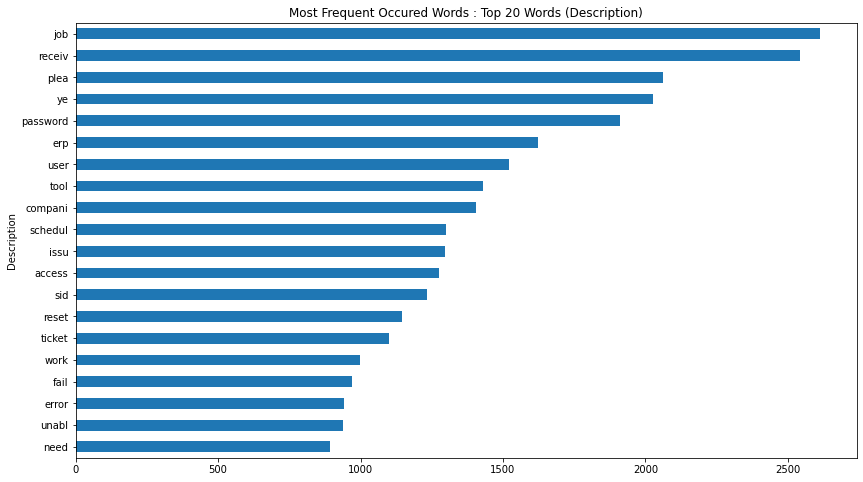

In [0]:
#visulaizing the words
fig = plt.figure(figsize=(14, 8))
plt.title("Most Frequent Occured Words : Top 20 Words (Description)")
top_20_words.plot(kind='barh')

In [0]:
#checking for bi-grams(two adjacent elements from a string of token)
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
  
#getting top 20 bi-grams
common_words = get_top_n_bigram(df_filtered_m['Description'], 20)
for word, freq in common_words:
    print(word, freq)
top_20_bigrams = pd.DataFrame(common_words, columns = ['Description' , 'count'])
top_20_bigrams = top_20_bigrams.groupby('Description').sum()['count'].sort_values(ascending=True)

job schedul 974
fail job 810
bpctwhsn kzqsbmtp 810
schedul bpctwhsn 806
receiv job 787
job job 641
password reset 486
job fail 484
cid imag 478
backup circuit 441
receiv hello 401
reset password 349
erp sid 349
engin tool 343
password manag 331
telecom vendor 320
type outag 286
schedul mainten 286
ye compani 285
circuit ye 285


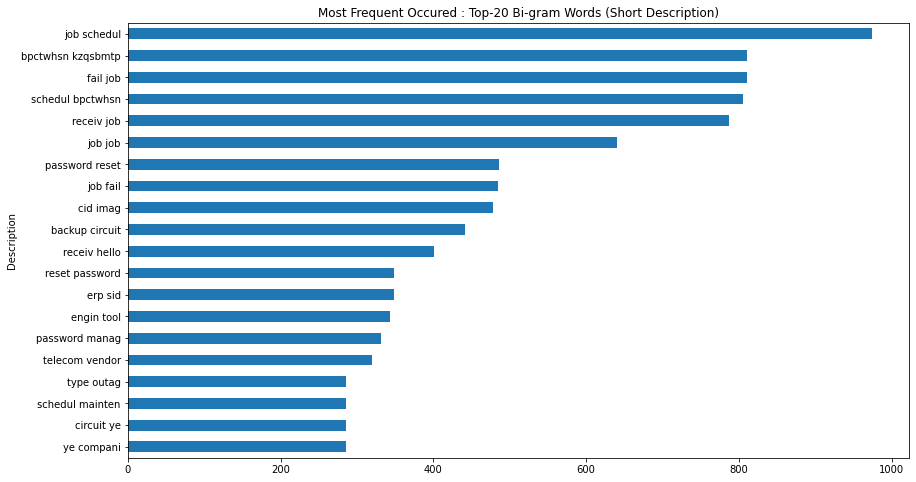

In [0]:
#visualizing top 20 bigrams
fig = plt.figure(figsize=(14, 8))
plt.title("Most Frequent Occured : Top-20 Bi-gram Words (Short Description)")
top_20_bigrams.plot(kind='barh')

In [0]:
#WordCloud is good for text visualization
#installing wordcloud to visulaize the above data
!pip install Wordcloud
from wordcloud import WordCloud

In [0]:
#stopwords
stop = stopwords.words('english')

Text(0.5, 1.0, 'Most Frequent Uni-gram Words - Description Attribute')

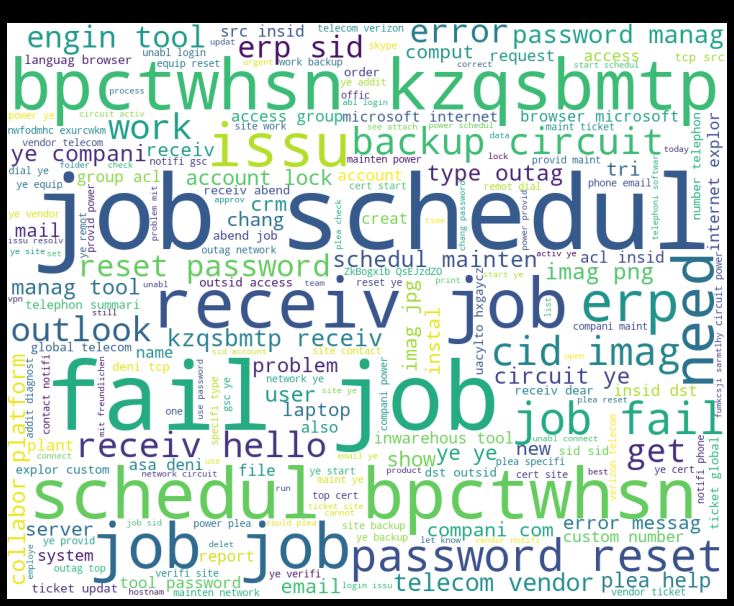

In [0]:
def wordcloud(text,stopwords,ngram=1):
    # text: if ngram>1, text should be a dictionary
    wordcloud = WordCloud(width=1000, 
                          height=800,
                          background_color='white',
                          stopwords=stop)
    if ngram ==1:
       wordc = wordcloud.generate(' '.join(text))
    else:
       wordc = wordcloud.generate_from_frequencies(text)
    plt.figure(figsize=(10,8), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
wordcloud(df_filtered_m.Description,stop)
plt.title("Most Frequent Uni-gram Words - Description Attribute")

## **VISUALIZATIONS FOR TOP 4 GROUPS**

Text(0.5, 1.0, 'Most Frequent Uni-gram Words - Description Attribute with Group_0')

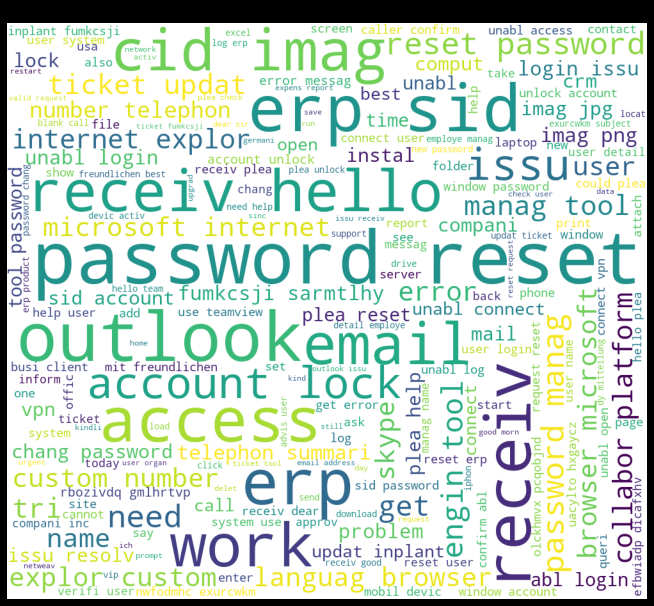

In [0]:
#GROUP 0
def wordcloud(text,stopwords,ngram=1):
    # text: if ngram>1, text should be a dictionary
    wordcloud = WordCloud(width=1000, 
                          height=900,
                          background_color='White',
                          stopwords=stop)
    if ngram ==1:
       wordc = wordcloud.generate(' '.join(text))
    else:
       wordc = wordcloud.generate_from_frequencies(text)
    plt.figure(figsize=(10,8), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
wordcloud(df_filtered_m.Description[df_filtered_m['Assignment group']=='GRP_0'],stop)
plt.title("Most Frequent Uni-gram Words - Description Attribute with Group_0")

Text(0.5, 1.0, 'Most Frequent Uni-gram Words - Description Attribute with Group_8')

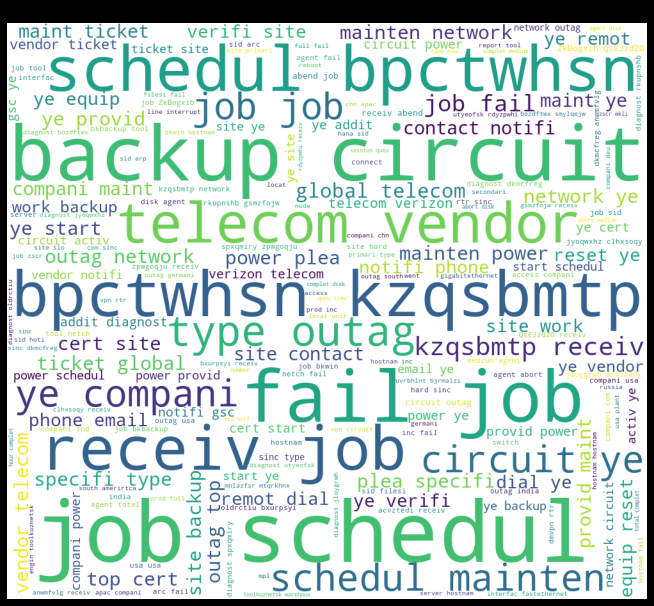

In [0]:
#GROUP 8
def wordcloud(text,stopwords,ngram=1):
    # text: if ngram>1, text should be a dictionary
    wordcloud = WordCloud(width=1000, 
                          height=900,
                          background_color='White',
                          stopwords=stop)
    if ngram ==1:
       wordc = wordcloud.generate(' '.join(text))
    else:
       wordc = wordcloud.generate_from_frequencies(text)
    plt.figure(figsize=(10,8), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
wordcloud(df_filtered_m.Description[df_filtered_m['Assignment group']=='GRP_8'],stop)
plt.title("Most Frequent Uni-gram Words - Description Attribute with Group_8")

Text(0.5, 1.0, 'Most Frequent Uni-gram Words - Description Attribute with Group_24')

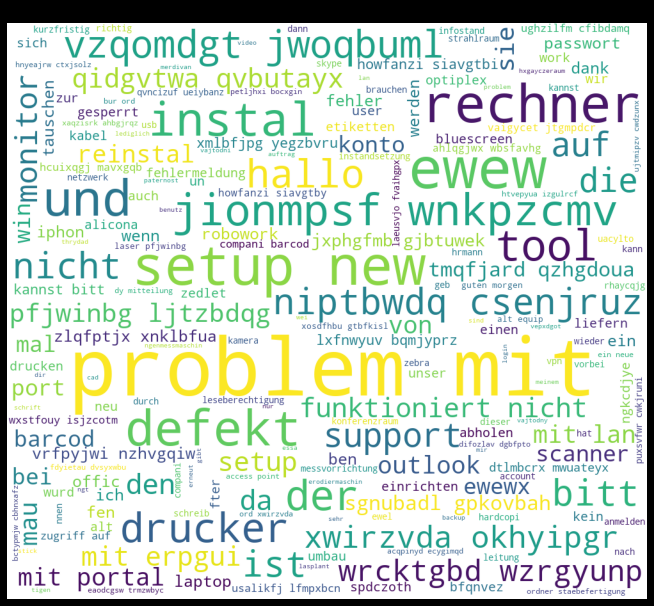

In [0]:
#GROUP 24
def wordcloud(text,stopwords,ngram=1):
    # text: if ngram>1, text should be a dictionary
    wordcloud = WordCloud(width=1000, 
                          height=900,
                          background_color='White',
                          stopwords=stop)
    if ngram ==1:
       wordc = wordcloud.generate(' '.join(text))
    else:
       wordc = wordcloud.generate_from_frequencies(text)
    plt.figure(figsize=(10,8), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
wordcloud(df_filtered_m.Description[df_filtered_m['Assignment group']=='GRP_24'],stop)
plt.title("Most Frequent Uni-gram Words - Description Attribute with Group_24")

Text(0.5, 1.0, 'Most Frequent Uni-gram Words - Description Attribute with Group_12')

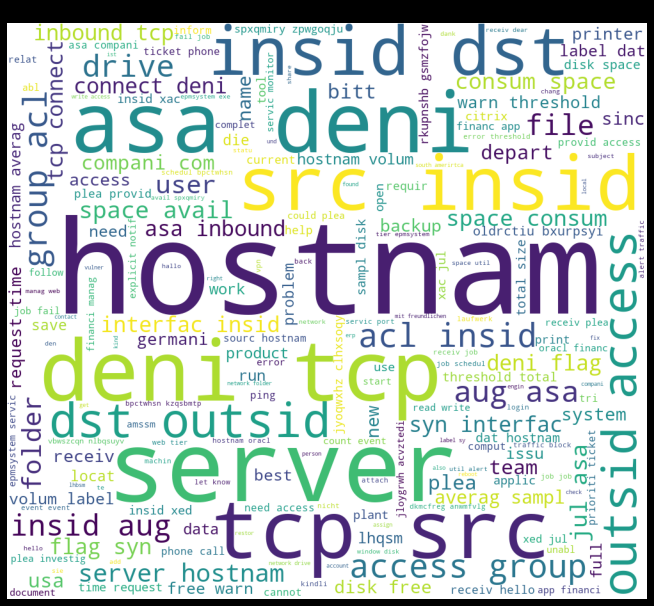

In [0]:
#GROUP 12
def wordcloud(text,stopwords,ngram=1):
    # text: if ngram>1, text should be a dictionary
    wordcloud = WordCloud(width=1000, 
                          height=900,
                          background_color='White',
                          stopwords=stop)
    if ngram ==1:
       wordc = wordcloud.generate(' '.join(text))
    else:
       wordc = wordcloud.generate_from_frequencies(text)
    plt.figure(figsize=(10,8), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
wordcloud(df_filtered_m.Description[df_filtered_m['Assignment group']=='GRP_12'],stop)
plt.title("Most Frequent Uni-gram Words - Description Attribute with Group_12")

In [0]:
#WORD EMBEDDING

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
df_filtered_m['Description_len'] = df_filtered_m['Description'].astype(str).apply(len)
df_filtered_m['Des_word_count'] = df_filtered_m['Description'].apply(lambda x: len(str(x).split()))
df_filtered_m.tail(40)


,Description,Assignment group,nndes,mldes,Description_len,Des_word_count
8460,receiv abend job job schedul job ZkBogxib QsEJ...,GRP_9,receiv abend job job schedul job ZkBogxib QsEJ...,receiv abend job job schedul job ZkBogxib QsEJ...,50,8
8461,reboot lhqsm patent web uacylto hxgaycz server...,GRP_8,reboot lhqsm patent web uacylto hxgaycz server...,reboot lhqsm patent web uacylto hxgaycz server...,71,10
8462,receiv abend job job schedul job ZkBogxib QsEJ...,GRP_9,receiv abend job job schedul job ZkBogxib QsEJ...,receiv abend job job schedul job ZkBogxib QsEJ...,50,8
8463,hello snhdfihytu kindli refer mail renew accou...,GRP_2,hello snhdfihytu kindli refer mail renew accou...,hello snhdfihytu kindli refer mail renew accou...,124,16
8464,sid log issu receiv could log sid uacylto hxga...,GRP_0,sid log issu receiv could log sid uacylto hxga...,sid log issu receiv could log sid uacylto hxga...,96,17
8465,vpn fcvqezmn frzyjknu,GRP_30,vpn fcvqezmn frzyjknu,vpn fcvqezmn frzyjknu,21,3
8466,receiv abend job job schedul bkwin hostnam inc...,GRP_8,receiv abend job job schedul bkwin hostnam inc...,receiv abend job job schedul bkwin hostnam inc...,64,10
8467,ntydihzo aeptfbg sent friday august nwfodmhc e...,GRP_0,ntydihzo aeptfbg sent friday august nwfodmhc e...,ntydihzo aeptfbg sent friday august nwfodmhc e...,260,39
8468,unblock account use outlook app nwfodmhc exurc...,GRP_0,unblock account use outlook app nwfodmhc exurc...,unblock account use outlook app nwfodmhc exurc...,195,28
8469,plant valu ad servic one day pick rout project...,GRP_18,plant valu ad servic one day pick rout project...,plant valu ad servic one day pick rout project...,172,29


In [0]:
df_filtered_m['Description_len'].max()

5357

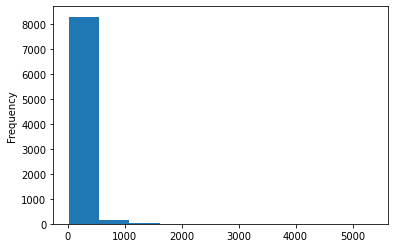

In [0]:
df_filtered_m['Description_len'].plot.hist()
plt.show()

from the above histogram we can notice max len is reaching around 2000 which is not required, we can take around 1200 .

In [0]:
df_filtered_m.drop(['Description_len','Des_word_count'],axis=1,inplace=True)


In [0]:
df_filtered_m

,Description,Assignment group,nndes,mldes
0,verifi user detail employe manag name check us...,GRP_0,verifi user detail employe manag name check us...,verifi user detail employe manag name check us...
1,receiv hello team meet skype meet etc appear o...,GRP_0,receiv hello team meet skype meet etc appear o...,receiv hello team meet skype meet etc appear o...
2,receiv cannot log vpn best eylqgodm ybqkwiam,GRP_0,receiv cannot log vpn best eylqgodm ybqkwiam,receiv cannot log vpn best eylqgodm ybqkwiam
3,unabl access tool page xbkucsvz gcpydteq,GRP_0,unabl access tool page xbkucsvz gcpydteq,unabl access tool page xbkucsvz gcpydteq
4,skype error owlgqjme qhcozdfx,GRP_0,skype error owlgqjme qhcozdfx,skype error owlgqjme qhcozdfx
...,...,...,...,...
8495,email come mail receiv good afternoon receiv e...,GRP_29,email come mail receiv good afternoon receiv e...,email come mail receiv good afternoon receiv e...
8496,telephoni softwar issu rbozivdq gmlhrtvp,GRP_0,telephoni softwar issu rbozivdq gmlhrtvp,telephoni softwar issu rbozivdq gmlhrtvp
8497,vip window password reset tifpdchb pedxruyf oy...,GRP_0,vip window password reset tifpdchb pedxruyf oy...,vip window password reset tifpdchb pedxruyf oy...
8498,machin est funcionando unabl access machin uti...,GRP_62,machin est funcionando unabl access machin uti...,machin est funcionando unabl access machin uti...


In [0]:
df_filtered_m.to_csv('eda.csv')
#saving it in a csv file for ease of running codes.

### EDA ENDS